### The difference between SVM and SVR

As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations(i.e., instances off the street).

- https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [14]:
import os
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]  # 沿x1移动的距离
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

#     svs = svm_clf.support_vectors_
#     plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [5]:
iris = datasets.load_iris()
print(iris.feature_names)
X = iris['data'][:, 2]   # petal length
y = iris['data'][:, 3]   # petal width
print(X[:5])
print(y[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 1.4  1.4  1.3  1.5  1.4]
[ 0.2  0.2  0.2  0.2  0.2]


分出一部分数据来做test

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, y_train.shape

((120,), (120,))

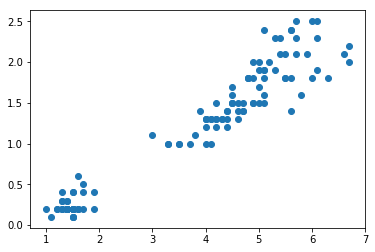

In [26]:
plt.scatter(X_train, y_train)

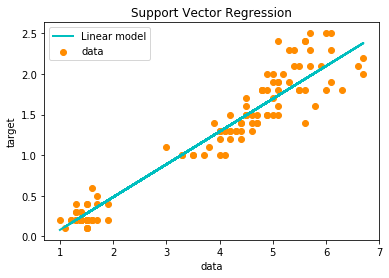

In [34]:
svr_lin = SVR(kernel='linear', C=1e3, epsilon=0.1)
y_lin = svr_lin.fit(X_train.reshape(-1, 1), y_train).predict(X_train.reshape(-1, 1))
lw = 2
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_train, y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
# plt.savefig('example2_SVR_1.png', dpi=200)
plt.show()

In [38]:
svr_lin.support_

array([  0,   1,   3,   5,   9,  10,  11,  13,  15,  16,  19,  21,  24,
        25,  27,  30,  31,  32,  33,  36,  37,  39,  40,  42,  43,  44,
        46,  53,  55,  56,  58,  59,  60,  61,  62,  63,  64,  68,  69,
        73,  74,  76,  77,  79,  81,  82,  83,  84,  85,  86,  87,  89,
        90,  91,  92,  93,  96,  97,  98, 100, 101, 102, 103, 105, 106,
       107, 109, 110, 111, 112, 114, 116], dtype=int32)

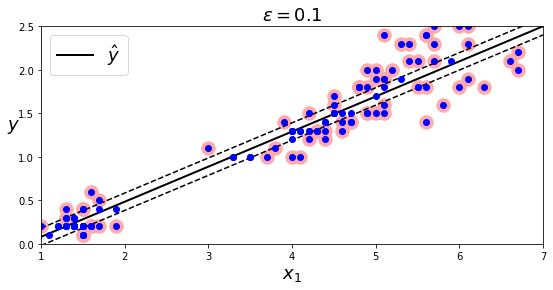

In [40]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")  # 预测的回归线
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")  # 回归线向上平移epsilon
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")  # 回归线向下平移epsilon
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))  # width, height in inches
# plt.subplot(121)
plot_svm_regression(svr_lin, X_train, y_train, [1, 7, 0, 2.5])  # 后面是坐标轴的范围
plt.title(r"$\epsilon = {}$".format(svr_lin.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)  # 可以设置旋转角度
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
# plt.annotate(
#         '', xy=(eps_x1, eps_y_pred), xycoords='data',
#         xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
#         textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
#     )
plt.show()